# Period Doubling and Chaos in Non-linear Difference Equations Code
This notebook provides useful functions to visualise the effects of changing the parameters in non-linear difference equations with the primary example being the logistic difference equation.

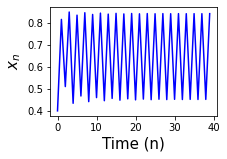

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
def f(x, r):
    """
    Logistic growth equation
    """
    return r*x*(1-x)

def create_population_plot(n: int, r: float, func, start: float = 0.4)-> None:
    """
    Shows how N varies against time for a given difference equation. Requires difference equation to have single parameter
    """
    n_series = np.zeros(n)
    n_series[0] = start
    for i in range(n-1):
        n_series[i+1] = func(n_series[i], r)

    fig, ax = plt.subplots(figsize=(3,2))
    ax.plot([i for i in range(n)], n_series, color="b")
    ax.set_xlabel("Time (n)", size=15)
    ax.set_ylabel(r"$x_n$", size=15)
    return fig

# Initial values to use and plot
r: float = 3.4
n = 40
fig = create_population_plot(n, r, func=f)
fig.savefig("period_2_graph.png", bbox_inches='tight', dpi=150)

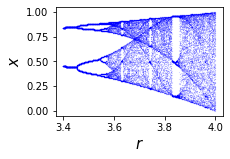

In [102]:
def create_orbit_plot(r_space: np.array, func)->None:
    """
    Code to visualise an orbit diagram for single parameter
    non-linear difference occasion over a specified parameter space
    """
    x = np.random.uniform(0, 1)
    coords = []
    for r in r_space:
        x_0: float = x
        for i in range(300):
            x = func(x, r)
        for i in range(30):
            x = f(x, r)
            coords.append([r, x])
    coords = np.array(coords) 
    fig, ax = plt.subplots(figsize=(3,2))
    ax.plot(coords[:, 0], coords[:, 1], 'b.', markersize=0.1)
    ax.set_xlabel(r"$r$", size=15)
    ax.set_ylabel(r"$x$", size=15)
    return fig

# Plot orbit for the logistic difference equation
fig = create_orbit_plot(np.linspace(3.4, 4, 1000), f)
fig.savefig("logistic_orbit_plot.png", bbox_inches='tight', dpi=150)

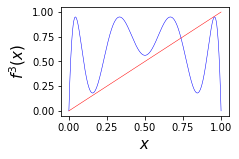

In [103]:
N: int = 1000
x = np.linspace(0, 1, 1000)
r = 3.8
f_cube = f(f(f(x, r), r), r)

delta = 1 / N
pts = []

for i in range(1000):
    if abs(x[i]-f_cube[i])<delta:
        pts.append([x[i], x[i]])

pts.remove([0, 0])
pts = np.array(pts)

fig, ax = plt.subplots(figsize=(3,2))
ax.plot(x, f_cube, 'b', linewidth='0.5')
ax.plot(x, x, 'r', linewidth=0.5)
# Uncomment to label points
#ax.plot(pts[:, 0], pts[:, 1], 'gx', linewidth=0.2)
ax.set_xlabel(r"$x$", size=15)
ax.set_ylabel(r"$f^3(x)$", size=15)
fig.savefig(f"f_cubed_r_{r}.png", bbox_inches='tight', dpi=150)